# Top Grossing Movie Trends

The two datasets used are the [Top 1000 Highest Grossing Movies](https://www.kaggle.com/sanjeetsinghnaik/top-1000-highest-grossing-movies) and [Hollywood Synopsis (1995-2021)](https://www.kaggle.com/johnharshith/hollywood-theatrical-market-synopsis-1995-to-2021?select=TopProductionMethods.csv). The aim of this workbook is to investigate variables related to these datasets to reveal relationships of film characteristics and gross.  The process for analysis follows the CRISP-DM
procedure.

In [1]:
#Import required modules to clean, analyze an visualize data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline

#Read in the relevant datasets.
top_1000 = pd.read_csv('./Top1000.csv')
annual = pd.read_csv('./AnnualTicketSales.csv')
highest_gross = pd.read_csv('./HighestGrossers.csv')
top_dist = pd.read_csv('./TopDistributors.csv')
top_genres = pd.read_csv('./TopGenres.csv')
top_mpaa = pd.read_csv('./TopGrossingRatings.csv')
top_prod = pd.read_csv('./TopProductionMethods.csv')

#Check df 
top_genres.head()

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,"1,102","$64,529,536,530","$58,556,748",27.14%
1,2,Action,"1,098","$49,339,974,493","$44,936,224",20.75%
2,3,Drama,"5,479","$35,586,177,269","$6,495,013",14.97%
3,4,Comedy,"2,418","$33,687,992,318","$13,932,172",14.17%
4,5,Thriller/Suspense,"1,186","$19,810,201,102","$16,703,374",8.33%


### 1) Does the prodution method influence gross of a film?

The dataset does not contain which movies were produced with which methods but contain valuable data for the gross and quantity. The following shows the cleaning process to remove parsing to make is viable for analysis. [NOTE: Only execute this cell once or restart the kernel]

In [2]:
#Clean strings of ',' andd '$'.
top_prod['MOVIES'] = top_prod['MOVIES'].str.replace(',','')
top_prod['TOTAL GROSS'] = top_prod['TOTAL GROSS'].str.replace(',','')
top_prod['TOTAL GROSS'] = top_prod['TOTAL GROSS'].str.replace('$','')
top_prod['AVERAGE GROSS'] = top_prod['AVERAGE GROSS'].str.replace(',','')
top_prod['AVERAGE GROSS'] = top_prod['AVERAGE GROSS'].str.replace('$','')
top_prod['MARKET SHARE'] = top_prod['MARKET SHARE'].str.replace('%','')


top_prod.head(8)

<ipython-input-2-ff13ced62b41>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  top_prod['TOTAL GROSS'] = top_prod['TOTAL GROSS'].str.replace('$','')
<ipython-input-2-ff13ced62b41>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  top_prod['AVERAGE GROSS'] = top_prod['AVERAGE GROSS'].str.replace('$','')


,RANK,PRODUCTION METHODS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Live Action,14613,179637201848,12292972,75.56
1,2,Animation/Live Action,264,30346622254,114949327,12.76
2,3,Digital Animation,365,23920180508,65534741,10.06
3,4,Hand Animation,164,2960497487,18051814,1.25
4,5,Stop-Motion Animation,37,676490120,18283517,0.28
5,6,Multiple Production Methods,26,43728300,1681858,0.02
6,7,Rotoscoping,4,8468385,2117096,0.00


The data is converted to float-type:

In [3]:
#Float conversion for the strings
top_prod['TOTAL GROSS'] = top_prod['TOTAL GROSS'].astype(np.float32)/1E9
top_prod['AVERAGE GROSS'] = top_prod['AVERAGE GROSS'].astype(np.float32)/1E6
top_prod['MARKET SHARE'] = top_prod['MARKET SHARE'].astype(float)/100

top_prod.head(8)

,RANK,PRODUCTION METHODS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Live Action,14613,179.637207,12.292972,0.7556
1,2,Animation/Live Action,264,30.346622,114.949326,0.1276
2,3,Digital Animation,365,23.920181,65.534737,0.1006
3,4,Hand Animation,164,2.960497,18.051813,0.0125
4,5,Stop-Motion Animation,37,0.676490,18.283516,0.0028
5,6,Multiple Production Methods,26,0.043728,1.681858,0.0002
6,7,Rotoscoping,4,0.008468,2.117096,0.0000


A new dataframe is created, where the relevant columns are subsetted. The dataframe is plotted as a bar figure. The total and average gross shows the top three methods are live action, animation and digital animation. In addition, more exclusively live action movies are produced but does not yield the highest gross on average, where digital animation leads the group.

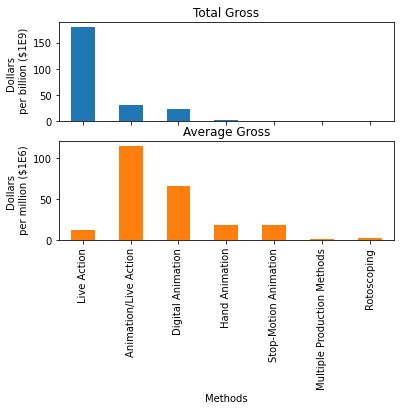

In [20]:
#Initiate variables for subset
index = top_prod['PRODUCTION METHODS']
total_g = top_prod['TOTAL GROSS']
avg_g = top_prod['AVERAGE GROSS']

#Subset data to new df for bar figure
prod_bar = pd.DataFrame({'Methods':index, 'Total Gross':total_g, 'Average Gross':avg_g})
prod_bar.set_index('Methods', inplace=True)

#Plot bar figure for aveage and total gross
ax1 = prod_bar.plot(kind='bar', subplots=True, legend=False)
ax1[0].set_ylabel('Dollars \n per billion ($1E9)')
ax1[1].set_ylabel('Dollars \n per million ($1E6)')
ax1[0].set_title('Total Gross')

#Saving .png file of figure
plt.savefig('ProductionBar.png', bbox_inches='tight', dpi=150)

### 2) How does runtime affect movie gross?

The dataset of the top 1000 films, contains data for the runtime of each entry.  It is listed as a object/string, so cleaning is required. There are no NaN values so all rows can be used. The data of interest are all the sales variables and runtime.

In [5]:
#Check dataframe sample and drop 'Unnamed column'
top_1000.drop('Unnamed: 0', axis='columns', inplace=True)

top_1000.head(2)

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13


In [6]:
#Check data types
top_1000.dtypes

#Check if any NaN values are in the 'Movie Runtime' column
top_1000['Movie Runtime'].isnull().sum()

0

The following removes the 'min' substring for simpler extraction of the runtime.

In [7]:
#top_1000['Movie Runtime'] = top_1000['Movie Runtime'].str.replace(' hr ', '-')
top_1000['Movie Runtime'] = top_1000['Movie Runtime'].str.replace(' min', '')

top_1000.head(2)

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1,PG-13


The runtime currently in a format of 'X hr XX min' is a string type and hard to compare to other movie runtimes. It is required to convert the runtime to one specific unit eg. minutes.

In [8]:
#Initiate variables for loop
hour = 0
minu = 0
runtime = []

#Append strings to list, and convert the strings to int and calculates the total runtime in minutes
for row in range(len(top_1000.index)):
    runtime.append(top_1000['Movie Runtime'][row])
    hour = runtime[row][0]
    if len(runtime[row]) > 4:
        minu = runtime[row][5:]
    runtime[row] = int(hour) * 60 + int(minu)
    minu = 0
    
#Replace the existing column with runtime in minutes    
top_1000['Movie Runtime'] = runtime
top_1000.head(2)

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",138,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",181,PG-13


The following analysis, takes a look into the statistics between the numeric variables of the dataset. The first is histograms of the variables, which visually shows the right skewed distribution of 'Movie Runtime', while the sales is also right skewed, the distribution is more exponential.

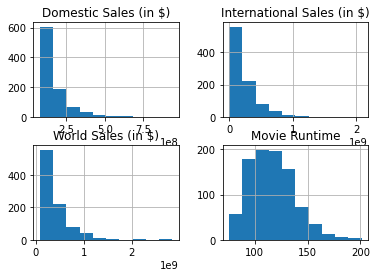

In [9]:
#Plot histogram for numeric varibles
top_1000.hist();

The second shows the correlation between the variables. As shown, there are strong relationships between the sales. However, there is a weak positive correlation between 'Movie Runtime' and all the sales variables. 

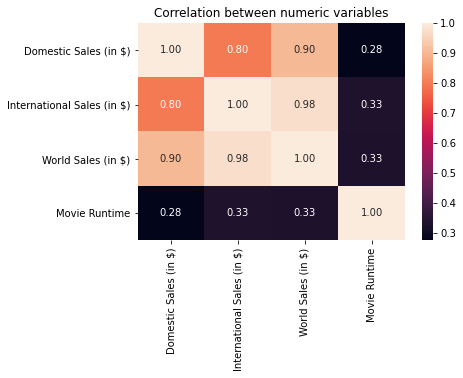

In [10]:
#Plot correlation for numeric variables
ax2 = sns.heatmap(top_1000.corr(), annot=True, fmt=".2f");
ax2.set_title('Correlation between numeric variables')

#Saving .png file of figure
plt.savefig('NumericCorrelation.png', bbox_inches='tight', dpi=150)

The last showcase, clarifies the correlation between 'World Sales' and 'Movie Runtime' There is some linearity, but the spread around the means are too unpredictable. Thus, the conclusion can be that runtime is not a particularly significant measure of gross.

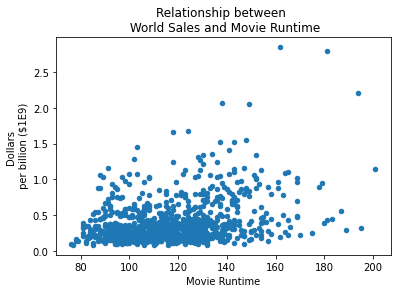

In [11]:
#Extract column and normalize and subset to same df
w_sales = top_1000['World Sales (in $)']/1E9
top_1000['World Sales (in $)'] = w_sales

#Plot scatter plot of runtime vs world sales
ax3 = top_1000.plot.scatter(x='Movie Runtime', y='World Sales (in $)')
ax3.set_ylabel("Dollars \n per billion ($1E9)")
ax3.set_title('Relationship between \n World Sales and Movie Runtime')

#Saving .png file of figure
plt.savefig('RuntimeGrossScatter.png', bbox_inches='tight', dpi=150)

### 3) Which genres are popular in term of gross over time?

The cinema industry has been around for almost a millenia and many genres have been introduced. The two relevant datasets contain a wide timeframe: 1995-2021. Which genres generate the most gross over the years? The genres for the latest films (2019-2021) are filled with the correct genre. Furthermore, cleaning is required for analysis.

In [12]:
#Fill the latest films with 'Action'
highest_gross.fillna('Action', inplace=True)

#highest_gross.head(30)

In [13]:
#Clean strings of ',' andd '$'.
highest_gross['TOTAL FOR YEAR'] = highest_gross['TOTAL FOR YEAR'].str.replace(',','')
highest_gross['TOTAL FOR YEAR'] = highest_gross['TOTAL FOR YEAR'].str.replace('$','')
highest_gross['TOTAL IN 2019 DOLLARS'] = highest_gross['TOTAL IN 2019 DOLLARS'].str.replace(',','')
highest_gross['TOTAL IN 2019 DOLLARS'] = highest_gross['TOTAL IN 2019 DOLLARS'].str.replace('$','')
highest_gross['TICKETS SOLD'] = highest_gross['TICKETS SOLD'].str.replace(',','')
highest_gross['TICKETS SOLD'] = highest_gross['TICKETS SOLD'].str.replace('$','')

highest_gross.head()

<ipython-input-13-d6b425f165c2>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  highest_gross['TOTAL FOR YEAR'] = highest_gross['TOTAL FOR YEAR'].str.replace('$','')
<ipython-input-13-d6b425f165c2>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  highest_gross['TOTAL IN 2019 DOLLARS'] = highest_gross['TOTAL IN 2019 DOLLARS'].str.replace('$','')
<ipython-input-13-d6b425f165c2>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  highest_gross['TICKETS SOLD'] = highest_gross['TICKETS SOLD'].str.replace('$','')


,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112,387522978,42306002
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255,634504608,69269062
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,250650052,500207943,54607854
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081,865842808,94524324
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,776153749,84732942


The following converts the string objects to floats and normalize. The gross for release year, total gross in 2019 andd tickets are affected. The means of each genre based on these variables are assessed.

In [14]:
#Convert strings to floats and normalize
highest_gross['TOTAL FOR YEAR'] = highest_gross['TOTAL FOR YEAR'].astype(np.float32)/1E6
highest_gross['TOTAL IN 2019 DOLLARS'] = highest_gross['TOTAL IN 2019 DOLLARS'].astype(np.float32)/1E6
highest_gross['TICKETS SOLD'] = highest_gross['TICKETS SOLD'].astype(np.float32)/1E6

In [15]:
#Combining genre and gross for year and calculating the mean
highest_gross.groupby(['GENRE']).mean()['TOTAL FOR YEAR']

GENRE
Action       477.876190
Adventure    385.852722
Drama        184.031097
Name: TOTAL FOR YEAR, dtype: float32

In [16]:
#Combining genre and gross for 2019 and calculating the mean
highest_gross.groupby(['GENRE']).mean()['TOTAL IN 2019 DOLLARS']

GENRE
Action       532.414795
Adventure    583.846985
Drama        387.522980
Name: TOTAL IN 2019 DOLLARS, dtype: float32

In [17]:
#Combining genre and tickets sold and calculating the mean
highest_gross.groupby(['GENRE']).mean()['TICKETS SOLD']

GENRE
Action       58.123886
Adventure    63.738754
Drama        42.306000
Name: TICKETS SOLD, dtype: float32

The groupby function shows that for release year, 'Action' is the top grossing genre. However, for the adjusted gross in 2019, 'Adventure earned more.

To investigate the change of genre over time, a cumulative sum can be used to count the number of films in each genre. This can be plotted for the timeframe. There are not too many data  points to justify any conclusive analysis, but it is shown that the majority of top grossing films are 'Adventure' and 'Action', with Adventure with the most counts almost entirely for the timeframe.

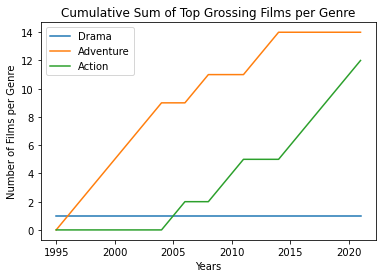

In [19]:
#Initiate variables for the loop
years = []
drama = []
adventure = []
action = []
prev_dr = 0
prev_ad = 0
prev_ac = 0

#Iterate through all films in dataset
for row in range(len(highest_gross.index)):
    #Initiate variables for cumulative sum
    if row > 0:
        prev_dr = drama[row - 1]
        prev_ad = adventure[row -1]
        prev_ac = action[row - 1]
        
    #Cumulative sum conditions for each genre
    if highest_gross['GENRE'][row] == 'Drama':
        drama.append(prev_dr + 1)
    else:
        drama.append(prev_dr)
    if highest_gross['GENRE'][row] == 'Adventure':
        adventure.append(prev_ad + 1)
    else:
        adventure.append(prev_ad)
    if highest_gross['GENRE'][row] == 'Action':
        action.append(prev_ac + 1) 
    else:
        action.append(prev_ac)
        
    #Initiation and creation of companion x-axis variable    
    if row == 0:
        prev_year = 1995
        years.append(prev_year)
    else:
        prev_year = years[row - 1]
        years.append(prev_year + 1)
        
#Plotting of cumulative sum ffor eeach genre        
plt.plot(years, drama, label='Drama')
plt.plot(years, adventure, label='Adventure')
plt.plot(years, action, label='Action')
plt.xlabel('Years')
plt.ylabel('Number of Films per Genre')
plt.title('Cumulative Sum of Top Grossing Films per Genre')
plt.legend()

#Saving .png file of figure
plt.savefig('CSumGenre.png', bbox_inches='tight', dpi=150)

The production method, runtime and genre was inspected throughout the analysis, to identify if the variables can be used for predicting gross andd present any other findings. The production method shows that certain methods show more gross than others but is not the most accurate measure. A production budget  would be a more predictable measure. The different runtimes shows weak positive relationship which cannot be usedd for any moels. Lastly the genre is aa complex variables as a film can belong to more than one. For the top 1000 grossing it is difficult to select a majory genre for each film. However, a genre prediction model can be considered for future work. Therefore, the three variables cannot be used for a gross prediction model.